# 2. Modeling

### 2.0 Load Train, Val, Test (Numpy Array)

- Gray Scale : Data_gray 폴더 안에 .npy 파일이 있으면 된다.
- RGB Scale : Data 폴더 안에 .npy 파일이 있으면 된다.

#### Scale 설정
- scale = 'gray'
- scale = 'rgb'

In [31]:
scale = 'gray'

if scale == 'gray':
    data_dir = 'Data_gray'
    channel = 1
    
elif scale == 'rgb':
    data_dir = 'Data'
    channel = 3

In [32]:
!ls {data_dir}

X_test.npy  X_train.npy  X_val.npy  y_test.npy	y_train.npy  y_val.npy


#### Load Data

In [33]:
import os
import numpy as np

if os.path.exists(data_dir):
    X_train = np.load(data_dir + '/X_train.npy')
    y_train = np.load(data_dir + '/y_train.npy')
    X_val = np.load(data_dir + '/X_val.npy')
    y_val = np.load(data_dir + '/y_val.npy')
    X_test = np.load(data_dir + '/X_test.npy')
    y_test = np.load(data_dir + '/y_test.npy')

    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)
    print(X_test.shape, y_test.shape)

(330, 64, 128, 128, 1) (330, 8)
(110, 64, 128, 128, 1) (110, 8)
(110, 64, 128, 128, 1) (110, 8)


### 2.1 C3D

#### 모델 이름 설정

In [41]:
model_name = 'c3d'

#### Parameters

In [34]:
epochs = 10
batch_size = 2

### 2.1.1 Model Define

In [35]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv3D(32, (3, 3, 3), activation = 'relu', input_shape = (64, 128, 128, channel)))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(64, (3, 3, 3), activation = 'relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Conv3D(128, (3, 3, 3), activation = 'relu'))
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 62, 126, 126, 32)  896       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 31, 63, 63, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 29, 61, 61, 64)    55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 14, 30, 30, 64)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 12, 28, 28, 128)   221312    
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 6, 14, 14, 128)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)           

### 2.1.2 Model Compile

In [36]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### 2.1.3 Model Fit

In [37]:
%%time

History = model.fit(X_train, y_train,
                   epochs = epochs,
                   batch_size = batch_size,
                   validation_data = (X_val, y_val))

Epoch 1/10
165/165 [==============================] - 38s 230ms/step - loss: 228.7857 - accuracy: 0.2347 - val_loss: 2.0326 - val_accuracy: 0.2818
Epoch 2/10
165/165 [==============================] - 37s 226ms/step - loss: 2.0120 - accuracy: 0.2710 - val_loss: 1.9776 - val_accuracy: 0.2818
Epoch 3/10
165/165 [==============================] - 37s 226ms/step - loss: 2.1824 - accuracy: 0.3338 - val_loss: 2.0227 - val_accuracy: 0.3091
Epoch 4/10
165/165 [==============================] - 37s 226ms/step - loss: 1.8341 - accuracy: 0.3833 - val_loss: 1.9889 - val_accuracy: 0.2636
Epoch 5/10
165/165 [==============================] - 37s 227ms/step - loss: 1.8945 - accuracy: 0.3450 - val_loss: 1.9872 - val_accuracy: 0.2636
Epoch 6/10
165/165 [==============================] - 37s 226ms/step - loss: 1.9956 - accuracy: 0.2808 - val_loss: 1.9794 - val_accuracy: 0.2909
Epoch 7/10
165/165 [==============================] - 37s 226ms/step - loss: 1.9452 - accuracy: 0.3084 - val_loss: 2.0195 - val_

### 2.1.4 Fitted Model Visualization

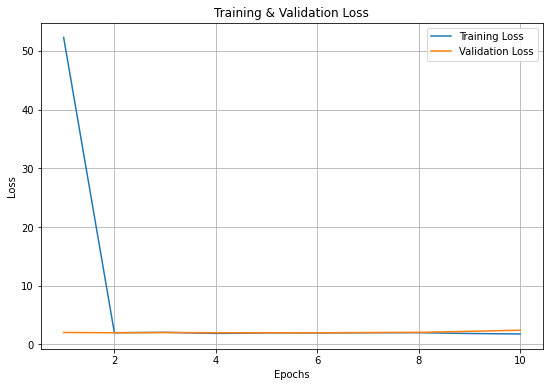

In [38]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['loss'])
plt.plot(epochs, History.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

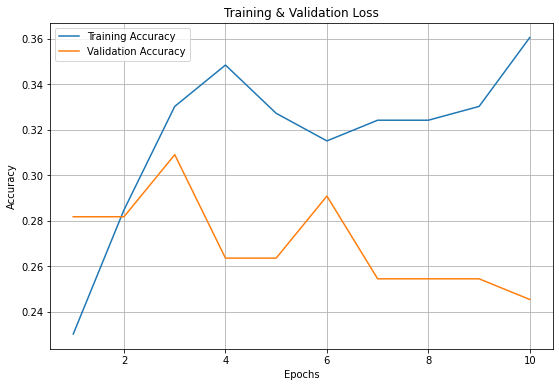

In [39]:
import matplotlib.pyplot as plt

epochs = range(1, len(History.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, History.history['accuracy'])
plt.plot(epochs, History.history['val_accuracy'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### 2.1.5 Model Evaluate

In [42]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

55/55 [==============================] - 4s 68ms/step - loss: 2.7691 - accuracy: 0.2818
Loss = 2.76906
Accuracy = 0.28182


### 2.1.6 Model Save

In [43]:
save_dir = 'Models'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

final_model_name = '/' + scale + '_' + model_name + '.h5'

model.save(save_dir + final_model_name)

### 2.1.7 Saved Model Test

In [44]:
from keras.models import load_model

gray_c3d = load_model(save_dir + final_model_name)

loss, accuracy = gray_c3d.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

55/55 [==============================] - 4s 65ms/step - loss: 2.7691 - accuracy: 0.2818
Loss = 2.76906
Accuracy = 0.28182
